In [29]:
import requests
import pandas as pd
import config
import json

import numpy as np 
import matplotlib.pyplot as plt
# %matplotlib inline

In [30]:
base_url="https://api.census.gov/data/2018/abscs"
key = config.key

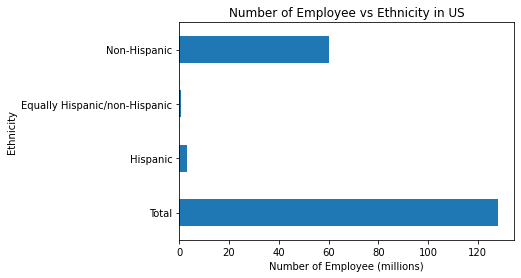

In [31]:
variable1 = "NAME,EMP,ETH_GROUP,ETH_GROUP_LABEL&for=us:*"
response = requests.get(base_url + "?get=" + variable1 + "&key=" + key).text
employee = pd.read_json(response)
employee.columns = employee.iloc[0] 
employee.drop(index=0, inplace=True)
employee['EMP'] = employee['EMP'].astype('int')/1000000
ax = employee.plot(title = 'Number of Employee vs Ethnicity in US',kind='barh', x='ETH_GROUP_LABEL',y='EMP')
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Number of Employee (millions)')
ax.get_legend().remove()
plt.show()

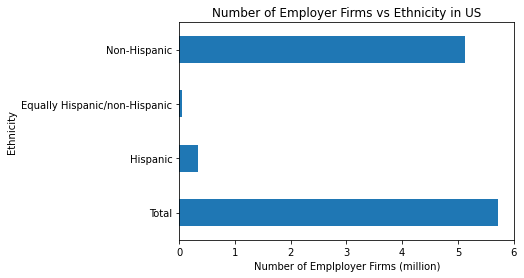

In [32]:
variable2 = "NAME,FIRMPDEMP,ETH_GROUP,ETH_GROUP_LABEL&for=us:*"
response = requests.get(base_url + "?get=" + variable2 + "&key=" + key).text
employer = pd.read_json(response)
employer.columns = employer.iloc[0] 
employer.drop(index=0, inplace=True)
employer['FIRMPDEMP'] = employer['FIRMPDEMP'].astype('int')/1000000
ax = employer.plot(title = 'Number of Employer Firms vs Ethnicity in US',kind='barh', x='ETH_GROUP_LABEL',y='FIRMPDEMP')
ax.set_ylabel('Ethnicity')
ax.set_xlabel('Number of Emplployer Firms (million)')
ax.get_legend().remove()
plt.show()

TypeError: 'str' object is not callable

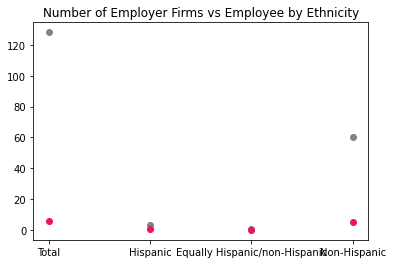

In [33]:
# print(employee)
employee = employee[['ETH_GROUP','EMP']]
merged = employer.merge(employee,how='inner',on='ETH_GROUP')

plt.scatter(merged.ETH_GROUP_LABEL,merged['EMP'],c='#838286',label='Number of Employee')
plt.scatter(merged.ETH_GROUP_LABEL,merged['FIRMPDEMP'],c='#ed1650', label='Number of Employer Firms')
plt.title('Number of Employer Firms vs Employee by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number')
plt.show()
# print(merged)

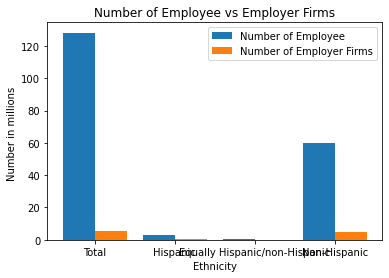

In [ ]:
X = merged.ETH_GROUP_LABEL
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, merged['EMP'], 0.4, label = 'Number of Employee')
plt.bar(X_axis + 0.2, merged['FIRMPDEMP'], 0.4, label = 'Number of Employer Firms')
  
plt.xticks(X_axis, X)
plt.xlabel("Ethnicity")
plt.ylabel("Number in millions ")
plt.title("Number of Employee vs Employer Firms")
plt.legend()
plt.show()

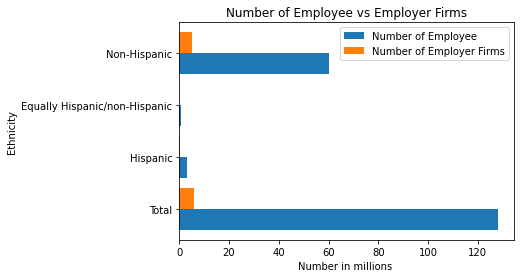

In [ ]:
Y = merged.ETH_GROUP_LABEL
Y_axis = np.arange(len(X))
  
plt.barh(Y_axis - 0.2, merged['EMP'], 0.4, label = 'Number of Employee')
plt.barh(Y_axis + 0.2, merged['FIRMPDEMP'], 0.4, label = 'Number of Employer Firms')
  
plt.yticks(Y_axis, Y)
plt.ylabel("Ethnicity")
plt.xlabel("Number in millions ")
plt.title("Number of Employee vs Employer Firms")
plt.legend()
plt.show()

[Text(0.5, 0, 'Number of Employee (millions)'), Text(0, 0.5, 'Ethnicity')]

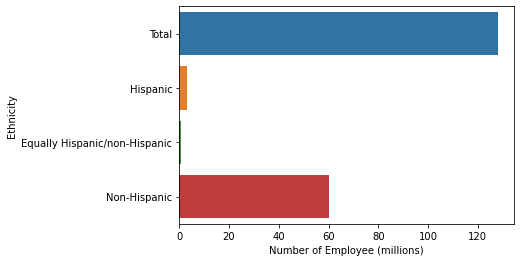

In [39]:
import seaborn as sns
fig = sns.barplot(x='EMP', y = 'ETH_GROUP_LABEL', data=merged)
fig.set(xlabel='Number of Employee (millions)', ylabel='Ethnicity')

[Text(0.5, 0, 'Number of Employer Firms (millions)'),
 Text(0, 0.5, 'Ethnicity')]

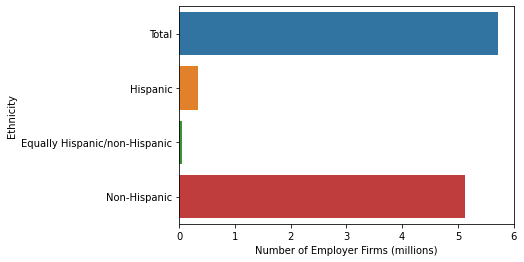

In [40]:
import seaborn as sns
fig = sns.barplot(x='FIRMPDEMP', y = 'ETH_GROUP_LABEL', data=merged)
fig.set(xlabel='Number of Employer Firms (millions)', ylabel='Ethnicity')